<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

# **Section 2 Project**

# 📝 ML Project
---
# LOL Analysis

# 🥇 GOAL: 데이터로 승리를 예측하는 모델을 만들고 다음 패치노트의 패치 방향을 예상해본다.
# ❓ Why: 특정 특성이 승리와 직결되면 승리 공식이 유저들 사이에 생겨 매번 똑같은 게임이 될 것이다. 이를 방지하고 더 다이내믹한 게임을 만들기 위해 이 프로젝트가 필요하다.
# 🎯 Target: 게임을 이기고 지는것을 예측할 것이므로 분류문제가 될 것이다.

# ✅ Theory: 골드의 수급량에 의해서 게임의 승패가 갈릴 것이다. 따라서 초반에 이득을 제일 많이 취할 수 있는 퍼스트블러드에 의해서 승패가 많이 좌지우지 될 것이다.

In [ ]:
!pip install category_encoders
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# IMPORT

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LOADING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/찬우/high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


# EDA

In [ ]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

데이터 상의 NULL값은 존재하지 않는다.

In [ ]:
df.duplicated().sum()

0

중복된 데이터가 없다.

In [ ]:
df.shape

(9879, 40)

# Feature Engineering

In [ ]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

Feature 중에서 blue와 red의 승패로 나뉜다. 따라서 target은 'blueWins'를 택하기로 한다.
승패는 상대적인 오브젝트, 그리고 골드의 수급량이 중요하므로 red와 차이를 둔 feature를 생성하기로 한다.<br/>
<br/>
**<생성하고자하는 컬럼들>**
1. blueWins (target)
2. blueWards_kd = blueWardsPlaced - redWardsDestroyed
3. blueFirstBlood
4. blue_kda = (blueKills+blueAssists)/blueDeaths
5. blueDragons
6. blueHeralds
7. blueTowersDestroyedDiff = blueTowersDestroyed - redTowersDestroyed
8. blueAvgLevelDiff = blueAvgLevel - redAvgLevel
9. blueMinionsKilledDiff = blueTotalMinionsKilled - redTotalMinionsKilled 
10. blueJungleMinionsKilled = blueTotalJungleMinionsKilled - redTotalJungleMinionsKilled
11. blueGoldDiff

In [ ]:
# create blueWards_kd
df['blueWards_kd'] = df['blueWardsPlaced'] - df['redWardsDestroyed']
# create blue_kda 
df['blue_kda'] = (df['blueKills'] + df['blueAssists'])/df['blueDeaths']
# create blueTowersDestroyedDiff
df['blueTowersDestroyedDiff'] = df['blueTowersDestroyed'] - df['redTowersDestroyed']
# create blueAvgLevelDiff
df['blueAvgLevelDiff'] = df['blueAvgLevel'] - df['redAvgLevel']
# create blueMinionsKilledDiff
df['blueMinionsKilledDiff'] = df['blueTotalMinionsKilled'] - df['redTotalMinionsKilled']
# create blueJungleMinionsKilled
df['blueJungleMinionsKilled'] = df['blueTotalJungleMinionsKilled'] - df['redTotalJungleMinionsKilled']

In [ ]:
# red features 삭제
red = []
for i in df.columns:
    if i.startswith('red'):
        red.append(i)

df_blue = df.drop(red,axis=1)

In [ ]:
df_blue.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'blueWards_kd', 'blue_kda',
       'blueTowersDestroyedDiff', 'blueAvgLevelDiff', 'blueMinionsKilledDiff',
       'blueJungleMinionsKilled'],
      dtype='object')

In [ ]:
drop_columns =['gameId','blueWardsPlaced','blueWardsDestroyed','blueKills','blueDeaths','blueAssists',
               'blueEliteMonsters','blueTowersDestroyed','blueTotalGold','blueAvgLevel','blueTotalExperience',
               'blueTotalMinionsKilled','blueTotalJungleMinionsKilled','blueExperienceDiff','blueCSPerMin',
               'blueGoldPerMin']
df_blue_tf = df_blue.drop(drop_columns,axis=1)

In [ ]:
df_blue_tf.columns

Index(['blueWins', 'blueFirstBlood', 'blueDragons', 'blueHeralds',
       'blueGoldDiff', 'blueWards_kd', 'blue_kda', 'blueTowersDestroyedDiff',
       'blueAvgLevelDiff', 'blueMinionsKilledDiff', 'blueJungleMinionsKilled'],
      dtype='object')

In [ ]:
df_blue_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueWins                 9879 non-null   int64  
 1   blueFirstBlood           9879 non-null   int64  
 2   blueDragons              9879 non-null   int64  
 3   blueHeralds              9879 non-null   int64  
 4   blueGoldDiff             9879 non-null   int64  
 5   blueWards_kd             9879 non-null   int64  
 6   blue_kda                 9879 non-null   float64
 7   blueTowersDestroyedDiff  9879 non-null   int64  
 8   blueAvgLevelDiff         9879 non-null   float64
 9   blueMinionsKilledDiff    9879 non-null   int64  
 10  blueJungleMinionsKilled  9879 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 849.1 KB


In [ ]:
df_blue_tf[abs(df_blue_tf['blueAvgLevelDiff']) >= 0.8]

,blueWins,blueFirstBlood,blueDragons,blueHeralds,blueGoldDiff,blueWards_kd,blue_kda,blueTowersDestroyedDiff,blueAvgLevelDiff,blueMinionsKilledDiff,blueJungleMinionsKilled
46,1,1,0,0,5096,11,10.000000,0,1.2,55,-5
64,0,0,1,0,-4061,10,0.700000,0,-0.8,-21,-31
65,0,0,0,0,-4920,51,1.083333,-1,-0.8,-52,-20
88,1,0,0,0,2547,14,5.500000,0,0.8,-15,23
89,0,0,1,0,-3685,10,0.500000,0,-0.8,10,-14
...,...,...,...,...,...,...,...,...,...,...,...
9815,1,1,0,0,4619,23,23.000000,0,0.8,19,-7
9823,0,0,0,0,-5059,9,1.000000,-1,-1.4,-68,-39
9831,0,0,1,0,-3084,33,0.818182,0,-1.0,-7,-12
9835,0,0,0,0,-6754,12,0.727273,-1,-1.8,-83,-16


탈주를 확인 할 수 있는 컬럼을 생성할 순 없을까?<br/>
어떤 기준으로 확인해야 될 지 모르겠다.

In [ ]:
target = 'blueWins'
train, test = train_test_split(df_blue_tf, train_size=0.80, test_size=0.20, 
                              stratify=df_blue_tf[target], random_state=2)
print("train shape: {}".format(train.shape))
print("test shape: {}".format(test.shape))

train shape: (7903, 11)
test shape: (1976, 11)


In [ ]:
train, val = train_test_split(df_blue_tf, train_size=0.90, test_size=0.10, 
                              stratify=df_blue_tf[target], random_state=2)
print("train shape: {}".format(train.shape))
print("val shape: {}".format(val.shape))

train shape: (8891, 11)
val shape: (988, 11)


0    0.500956
1    0.499044
Name: blueWins, dtype: float64

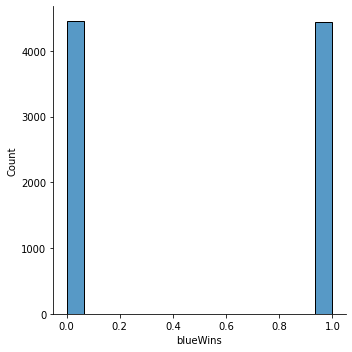

In [ ]:
%matplotlib inline
# skewed 확인
target = 'blueWins'
sns.displot(train[target]);
train[target].value_counts(normalize=True)

In [ ]:
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Modeling

In [ ]:
features = train.drop(columns=[target]).columns
features

Index(['blueFirstBlood', 'blueDragons', 'blueHeralds', 'blueGoldDiff',
       'blueWards_kd', 'blue_kda', 'blueTowersDestroyedDiff',
       'blueAvgLevelDiff', 'blueMinionsKilledDiff', 'blueJungleMinionsKilled'],
      dtype='object')

In [ ]:
# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리합니다
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
# 최빈값으로 기준모델 만들기
major = y_train.mode()[0]
y_pred = [major] * len(y_train) # 기준모델
accuracy_score(y_train, y_pred)  # 정확도

0.5009560229445507

In [ ]:
from xgboost import XGBClassifier
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [ ]:
model = XGBClassifier(
    n_estimators=1000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
    max_depth=7,        # default=3, high cardinality 특성을 위해 기본보다 높여 보았습니다.
    learning_rate=0.2,
#     scale_pos_weight=ratio, # imbalance 데이터 일 경우 비율을 적용합니다.
    n_jobs=-1,
    random_state=2
)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤

[0]	validation_0-error:0.247104	validation_1-error:0.29251
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.239681	validation_1-error:0.279352
[2]	validation_0-error:0.237769	validation_1-error:0.282389
[3]	validation_0-error:0.234844	validation_1-error:0.282389
[4]	validation_0-error:0.233607	validation_1-error:0.282389
[5]	validation_0-error:0.232707	validation_1-error:0.284413
[6]	validation_0-error:0.228096	validation_1-error:0.286437
[7]	validation_0-error:0.226859	validation_1-error:0.283401
[8]	validation_0-error:0.226971	validation_1-error:0.283401
[9]	validation_0-error:0.226746	validation_1-error:0.283401
[10]	validation_0-error:0.225059	validation_1-error:0.285425
[11]	validation_0-error:0.224497	validation_1-error:0.281377
[12]	validation_0-error:0.224272	validation_1-error:0.277328
[13]	validation_0-error:0.223484	validation_1-error:0.279

XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=1000, n_jobs=-1,
              random_state=2)

In [ ]:
from sklearn.metrics import classification_report
print('검증 정확도', model.score(X_val, y_val))

print(classification_report(y_val, model.predict(X_val)))


검증 정확도 0.7246963562753036
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       495
           1       0.73      0.71      0.72       493

    accuracy                           0.72       988
   macro avg       0.72      0.72      0.72       988
weighted avg       0.72      0.72      0.72       988



In [ ]:
print('검증 정확도', model.score(X_test, y_test))

검증 정확도 0.7854251012145749


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [ ]:
classifier = XGBClassifier(random_state=2)

params = {
 "n_estimators" : randint(50, 1000),
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7, 0.8, 0.9]
}

rs_model =RandomizedSearchCV(
        classifier, 
        param_distributions = params,
        n_iter=5,
        scoring='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=3
        )

#model fitting
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(random_state=2), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcf50ceb390>},
                   scoring='accuracy', verbose=3)

In [ ]:
rs_model.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.0, max_depth=5, min_child_weight=3,
              n_estimators=464, random_state=2)

In [ ]:
#parameters selected
pipe = rs_model.best_estimator_
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))

검증 정확도 0.7155870445344129
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       495
           1       0.73      0.69      0.71       493

    accuracy                           0.72       988
   macro avg       0.72      0.72      0.72       988
weighted avg       0.72      0.72      0.72       988



# Model Prediction

In [ ]:
print('테스트 정확도: ', pipe.score(X_test, y_test))

테스트 정확도:  0.7788461538461539


# Feature Importances

In [ ]:
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance 
from matplotlib import pyplot as plt

In [ ]:
pipe.feature_importances_

array([0.06303656, 0.15039809, 0.06814595, 0.23743747, 0.05743326,
       0.12047984, 0.04130203, 0.12835342, 0.06907595, 0.06433742],
      dtype=float32)

<BarContainer object of 10 artists>

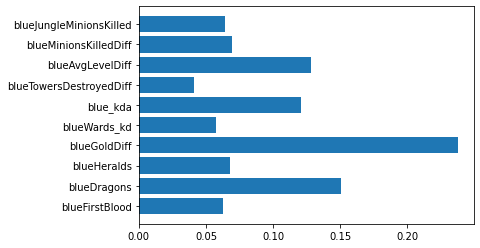

In [ ]:
plt.barh(X_train.columns, pipe.feature_importances_)

Text(0.5, 0, 'Xgboost Feature Importance')

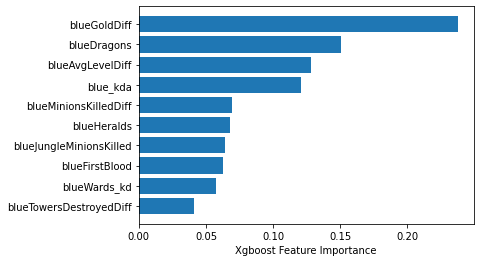

In [ ]:
sorted_idx = pipe.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], pipe.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
explainer = shap.TreeExplainer(pipe)

In [ ]:
row = X_test.iloc[[1]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row

,blueFirstBlood,blueDragons,blueHeralds,blueGoldDiff,blueWards_kd,blue_kda,blueTowersDestroyedDiff,blueAvgLevelDiff,blueMinionsKilledDiff,blueJungleMinionsKilled
5525,0,0,0,-180,42,1.2,0,0.2,-7,4


In [ ]:
# 예측값
pipe.predict(row)

array([0])

In [ ]:
# 모델이 이렇게 예측한 이유를 알기 위하여
# SHAP Force Plot을 그려보겠습니다.
explainer = shap.TreeExplainer(pipe)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

# Conclusion

# 🥇 GOAL: 데이터로 승리를 예측하는 모델을 만들고 다음 패치노트의 패치 방향을 예상해본다.
# ❓ Why: 특정 특성이 승리와 직결되면 승리 공식이 유저들 사이에 생겨 매번 똑같은 게임이 될 것이다. 이를 방지하고 더 다이내믹한 게임을 만들기 위해 이 프로젝트가 필요하다.
# 🎯 Target: 게임을 이기고 지는것을 예측할 것이므로 분류문제가 될 것이다.

# ✅ Theory: 골드의 수급량에 의해서 게임의 승패가 갈릴 것이다. 따라서 초반에 이득을 제일 많이 취할 수 있는 퍼스트블러드에 의해서 승패가 많이 좌지우지 될 것이다.

게임에서의 10분간 데이터를 보고 승리를 예측하는 모델을 만들었다.
리그오브레전드 공식 홈페이지에 따르면 평균 게임 시간은 30분 전후이지만, 게임 시작 후 10분간의 데이터를 통해서 승리를 예측하는 모델을 만들어봤다. 그 결과 예측 정확도는 약 78%로 예상했던 것 보다 높게 나왔다. 

특성의 중요도는 골드 차이, 평균 레벨, 드래곤 순으로 정렬 되었다. 가설에서 한 플레이어가 골드를 최대한으로 얻을 수 있는 First Blood는 그렇게 중요하지 않았다.

팀이 최대로 얻을 수 있는 골드의 량이 중요하고, 스킬을 올릴 수 있는 팀의 평균 레벨이 중요해보였다.

하지만 의외였던 것은 적의 첫 타워를 부수면 팀이 가져가는 이득이 큼에도 불구하고 승리에 직결되지 않는다는 것이었다. 또한 드래곤이 